## Class 005
*Working with data*: datascience Table

## Learning Goals for Lab 03
### Loading Data Sets and Exploratory Data Analysis
*neccessary*: 
`from datascience import *`
- Table is a new Variable & Data Types
    - Strings
    - Integer
    - float
    - list [ ]
    - numpy.array
    - datascience.tables.Table
- arrays: from datascience import *
    - `make_array(0.125, 4.75, -1.3)` 
- arrays: import numpy as np
    - `np.array([0, 1, -1, math.pi, math.e])`
    - `np.arange(1,13)` 
- lists: [1, 2, 3, 4]
#### Table
- `T=Table().with_columns('Month',np.arange(1,13))`
- `Table.read_table(data)`


#### Initialize with imported new functionality for plotting data.

In [32]:
# import for plotting
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### First data table

In [33]:
from datascience import *
import numpy as np

# Creates a table with one column
T=Table().with_columns('Month',np.arange(1,13))

In [34]:
# Adds a another column
T=T.with_columns('Average_SnowFall (inch)',make_array(5.6,5.6,2.4,0.1,0,0,0,0,0,0,0.1,3.2))

In [35]:
T.show()

Month,Average_SnowFall (inch)
1,5.6
2,5.6
3,2.4
4,0.1
5,0
6,0
7,0
8,0
9,0
10,0


## A digression on the Calendar Module

**calendar** is a module useful for various date, month, year tasks.
For example, you can use it to print a calendar.

In [36]:
import calendar

c = calendar.TextCalendar(calendar.SUNDAY)
str = c.formatmonth(2023, 9)
print(str)

   September 2023
Su Mo Tu We Th Fr Sa
                1  2
 3  4  5  6  7  8  9
10 11 12 13 14 15 16
17 18 19 20 21 22 23
24 25 26 27 28 29 30



The calendar module provides access to the names of the months in a list.

In [37]:
print(calendar.month_name[1])
print(calendar.month_name[12])

January
December


In [38]:
# Extract months 1 through 12. Remember: slicing goes up to but not including the last number.
calendar.month_name[1:13]

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

## Back to our first table

In [39]:
# Little nice trick to get months in list
import calendar
m = calendar.month_name[1:13]
m

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [40]:
# Replace the column with month names instead of numbers
T=T.with_columns('Month',m)
T.show()

Month,Average_SnowFall (inch)
January,5.6
February,5.6
March,2.4
April,0.1
May,0
June,0
July,0
August,0
September,0
October,0


In [41]:
# Sort months by snowfall amounts
T.sort('Average_SnowFall (inch)', descending=True)

Month,Average_SnowFall (inch)
January,5.6
February,5.6
December,3.2
March,2.4
April,0.1
November,0.1
May,0
June,0
July,0
August,0


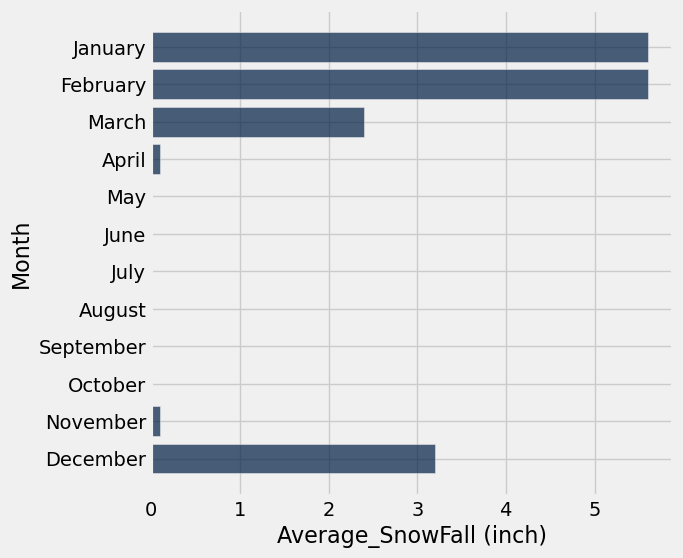

In [42]:
# Create a horizontal bar chart:  table.barh(Category, values)
T.barh('Month', 'Average_SnowFall (inch)')

### Google trend data example
#### 

In [43]:
# Read a table from a CSV file
path = 'data/'
data = path + 'Gtrend_NFC_012923.csv'
Gtrend = Table.read_table(data)
print(Gtrend.num_columns, Gtrend.num_rows)
Gtrend

4 168


Time,Philadelphia Eagles: (Worldwide),San Francisco 49ers: (Worldwide),Kansas City Chiefs: (Worldwide)
2023-01-23T12,2,3,1
2023-01-23T13,2,3,1
2023-01-23T14,2,3,1
2023-01-23T15,2,3,1
2023-01-23T16,2,3,1
2023-01-23T17,2,3,1
2023-01-23T18,2,3,1
2023-01-23T19,2,3,1
2023-01-23T20,2,3,1
2023-01-23T21,2,3,1


### Google Trend Numbers
Understanding the numbers Indexing: Google Trends data is pulled from a random, unbiased sample of Google searches, which means we don't have exact numbers for any terms or topics. In order to give a value to terms, we index data from 1-100, where 100 is the maximum search interest for the time and location selected.

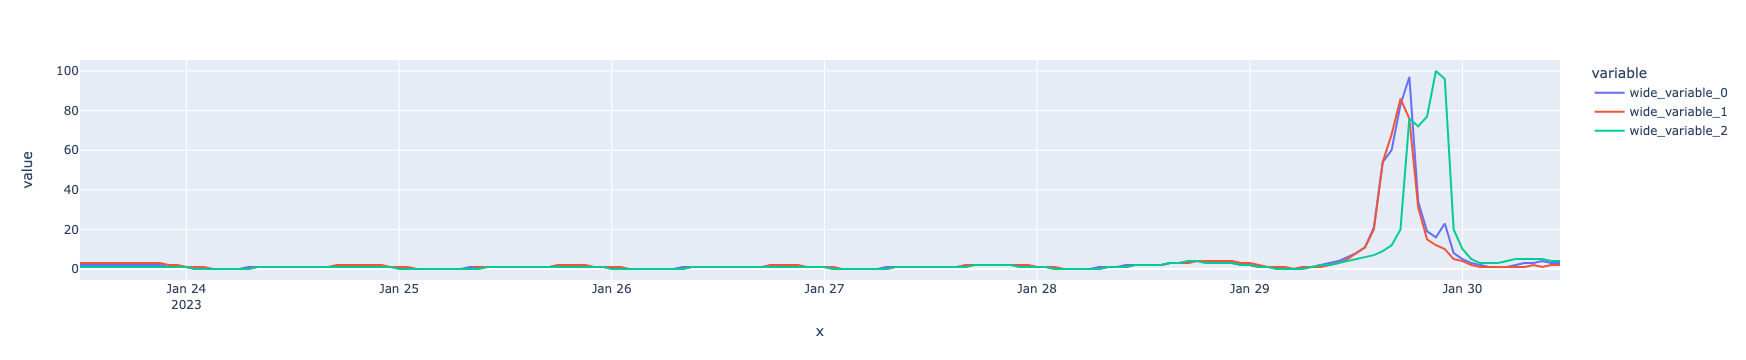

In [44]:
# Plotly is another plotting library callable from Python
# It is best used when you want interactive plots
import plotly.express as px

Eagles = Gtrend["Philadelphia Eagles: (Worldwide)"]
SanFran = Gtrend["San Francisco 49ers: (Worldwide)"]
Chiefs = Gtrend["Kansas City Chiefs: (Worldwide)"]
date = Gtrend["Time"].astype('datetime64[s]') # Using the retyping of the column which is a nump array
fig = px.line(x=date, y=[Eagles, SanFran, Chiefs])

fig.show()

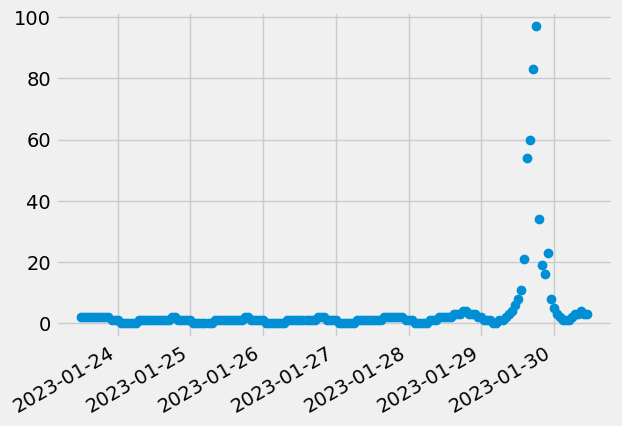

In [45]:
# In general, matplotlib is used to make plots for publication or printing
import matplotlib.dates
x_values = Gtrend["Time"].astype('datetime64[s]')
y_values = Gtrend["Philadelphia Eagles: (Worldwide)"]
dates = matplotlib.dates.date2num(x_values)
plt.plot_date(x_values, y_values)
plt.gcf().autofmt_xdate()
plt.show()

### Census data example
#### For your own exploration

In [47]:
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2020/national/asrh/nc-est2020-agesex-res.csv'
# A local copy can be accessed here in case census.gov moves the file:
# data = path_data + 'nc-est2015-agesex-res.csv'

full_census_table = Table.read_table(data)
full_census_table

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,0,3944153,3944160,3951495,3963264,3926731,3931411,3954973,3984144,3963268,3882437,3826908,3762227,3735010
0,1,3978070,3978090,3957904,3966768,3978210,3943348,3949559,3973828,4003586,3981864,3897917,3842257,3773884
0,2,4096929,4096939,4090799,3971498,3980139,3993047,3960015,3967672,3992657,4021261,3996742,3911822,3853025
0,3,4119040,4119051,4111869,4102429,3983007,3992839,4007852,3976277,3984985,4009060,4035053,4009037,3921526
0,4,4063170,4063186,4077511,4122252,4112849,3994539,4006407,4022785,3992241,4000394,4021907,4045996,4017847
0,5,4056858,4056872,4064653,4087770,4132349,4123745,4007123,4020489,4038022,4007233,4012789,4032231,4054336
0,6,4066381,4066412,4073031,4075153,4097860,4142923,4135738,4020428,4034969,4052428,4019106,4022432,4040169
0,7,4030579,4030594,4043100,4083399,4085255,4108453,4154947,4148711,4034355,4048430,4063647,4027876,4029753
0,8,4046486,4046497,4025624,4053313,4093553,4096033,4120476,4167765,4162142,4047130,4059209,4071894,4034785
0,9,4148353,4148369,4125413,4035854,4063662,4104437,4107986,4133426,4181069,4175085,4058207,4067320,4078668


In [48]:
# Make a new table with four columns from the census data
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2020')
partial_census_table

SEX,AGE,POPESTIMATE2010,POPESTIMATE2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


In [49]:
# Return the data from a particular column as an array
partial_census_table.column("AGE")

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 999,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  7

In [14]:
# You can perform math operation on an entire array at once.
# This is called "broadcasting" the operation to all of the array elements.

3*partial_census_table.column("AGE")

array([   0,    3,    6,    9,   12,   15,   18,   21,   24,   27,   30,
         33,   36,   39,   42,   45,   48,   51,   54,   57,   60,   63,
         66,   69,   72,   75,   78,   81,   84,   87,   90,   93,   96,
         99,  102,  105,  108,  111,  114,  117,  120,  123,  126,  129,
        132,  135,  138,  141,  144,  147,  150,  153,  156,  159,  162,
        165,  168,  171,  174,  177,  180,  183,  186,  189,  192,  195,
        198,  201,  204,  207,  210,  213,  216,  219,  222,  225,  228,
        231,  234,  237,  240,  243,  246,  249,  252,  255,  258,  261,
        264,  267,  270,  273,  276,  279,  282,  285,  288,  291,  294,
        297,  300, 2997,    0,    3,    6,    9,   12,   15,   18,   21,
         24,   27,   30,   33,   36,   39,   42,   45,   48,   51,   54,
         57,   60,   63,   66,   69,   72,   75,   78,   81,   84,   87,
         90,   93,   96,   99,  102,  105,  108,  111,  114,  117,  120,
        123,  126,  129,  132,  135,  138,  141,  1

In [50]:
# Chaining methods: applying each method successively on the result of the previous method.
# The innermost operation is applied first.

us_pop = partial_census_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2020', '2020').relabeled('SEX','GENDER')
us_pop

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


In [51]:
# Using .where method [see:http://data8.org/datascience/reference-nb/datascience-reference.html#tbl.where() ]
# This selects rows from a table that satisfy some condition.

us_pop.where('GENDER',0)

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


In [52]:
popdata = us_pop.where('GENDER',0).where('AGE',are.below(99))
popdata

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


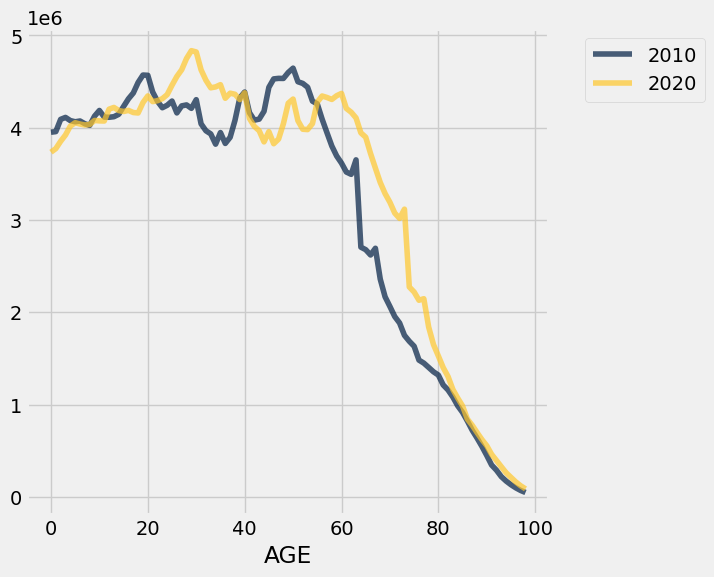

In [53]:
# Plot to see offset
popdata.select('AGE','2010','2020').plot('AGE')